<a href="https://colab.research.google.com/github/templar137/AI_project/blob/main/%EC%B9%98%EB%A7%A4%ED%99%98%EC%9E%90_%EC%A6%9D%EC%83%81%EB%B6%84%EB%A5%98_prototype_lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import random

# 모델
from lightgbm import LGBMClassifier

#시각화 툴
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None 

In [ ]:
x_train_path = '/content/train.csv'
y_train_path = '/content/train_label.csv'
x_test_path = '/content/test.csv'

x_train = pd.read_csv(x_train_path)
x_test = pd.read_csv(x_test_path)
y_train = pd.read_csv(y_train_path)

# 이메일당 라벨 부여하는 코드
print(len(x_train.iloc[:,1]))
for i in range (0,len(x_train.iloc[:,1])):
  for j in range (0,len(y_train.iloc[:,1])):
    if x_train.iloc[i,0] == y_train.iloc[j,0]:
      x_train.loc[i,'diag_NM'] = y_train.iloc[j,1]

# complete

#corr_x = x_train.corr()
#print(corr_x) 성공적

plt.figure(figsize=(25,25))
g = sns.heatmap(corr_x, annot=True, cmap="RdYlGn")
plt.show()
# 히트맵을 이용한 상관계수 시각화

9327


In [ ]:
x_train

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_1min,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,sleep_hr_lowest,sleep_hypnogram_5min,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_rmssd_5min,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,sleep_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8),CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8),diag_NM
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,...,14346,0,417,0,545,47,...,0,7,432,160,32,399,96,95,100,100,86,100,98,15867,592,13950,16.500,2100,35460,61,...,70.53,62,...,1,15030,6693,17280,960,0,4380,47,20,...,62,100,41,50,27,97,66,62,-0.12,-0.12,99.99,NaN,\r,2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...,0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...,0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...,4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...,0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...,CN
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,...,6352,0,473,0,392,8,...,0,8,249,24,29,538,91,78,100,100,83,100,97,7755,400,7680,17.375,2430,24720,69,...,68.01,63,...,1,12210,10495,11490,690,0,2400,56,19,...,54,100,49,43,46,91,35,44,-0.32,-0.32,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...,1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...,2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...,23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...,CN
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,...,7297,0,586,0,362,24,...,0,14,240,76,9,459,93,95,100,100,71,96,96,8341,386,11880,17.000,2820,33240,64,...,64.89,59,...,1,15780,5439,17460,1140,0,2760,48,26,...,61,100,56,47,34,89,41,62,0.07,0.07,99.99,NaN,\r,1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...,1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...,4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...,0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...,CN
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,...,491,0,176,0,34,1,...,0,1,18,3,19,1210,93,95,100,100,74,96,92,8122,35,9600,17.250,1770,29700,68,...,63.70,57,...,1,16350,7241,15750,1170,0,1980,59,30,...,55,100,35,40,44,86,29,56,-0.41,-0.41,99.99,NaN,\r,2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...,0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...,73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...,4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...,24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...,CN
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,...,5861,0,646,0,377,6,...,0,15,240,19,19,392,88,95,100,100,65,71,80,7378,383,10710,17.250,3150,31440,66,...,67.07,60,...,1,14010,6037,17220,3360,0,3570,42,23,...,56,100,64,55,39,14,54,59,-0.27,-0.27,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...,4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...,0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
x_train_org = x_train
# x_train 초기화 코드

In [ ]:
x_train = x_train_org

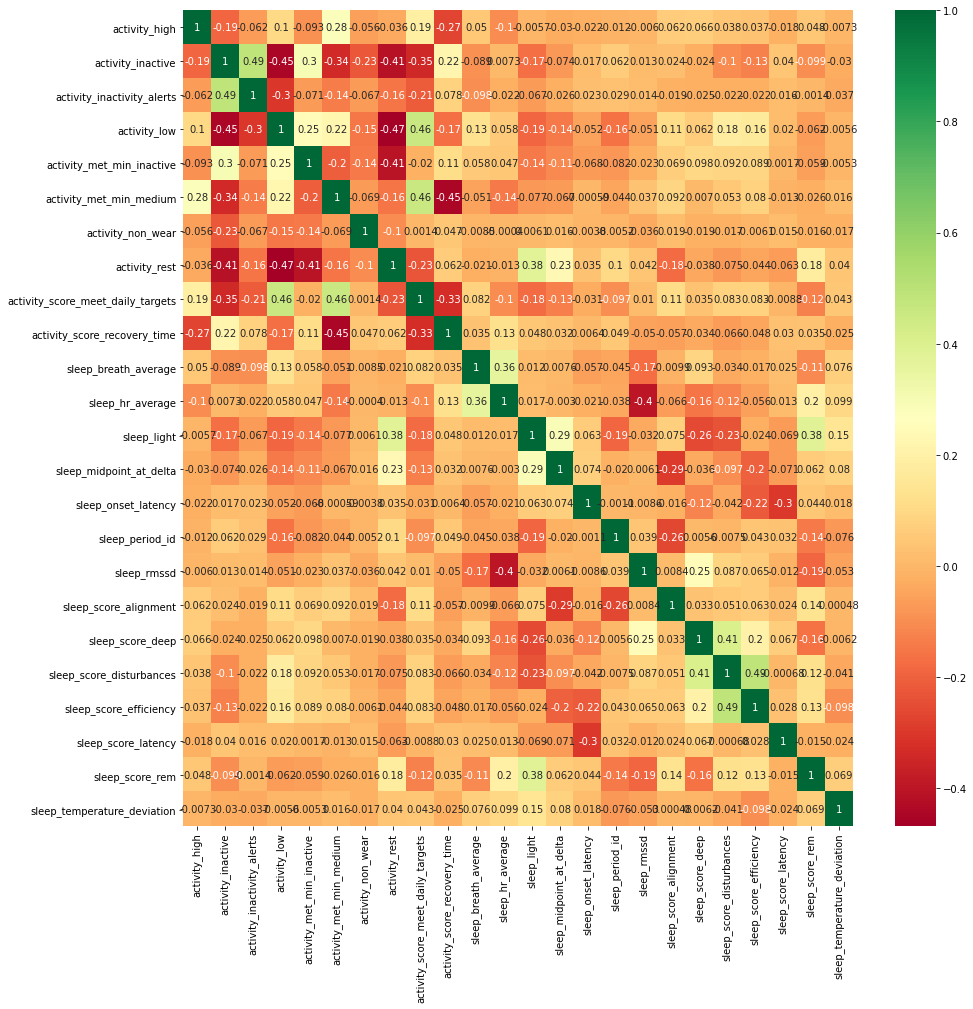

In [ ]:
plt.figure(figsize=(15,15))
g = sns.heatmap(corr_x, annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
# 불필요한 컬럼 제거 작업
drop = ['EMAIL', 'summary_date', 'activity_class_5min','activity_met_1min', 'sleep_hr_5min', 'sleep_hypnogram_5min',
        'sleep_is_longest', 'sleep_rmssd_5min', 'timezone', 'sleep_total','sleep_temperature_trend_deviation', 
        'CONVERT(activity_class_5min USING utf8)','CONVERT(activity_met_1min USING utf8)', 'CONVERT(sleep_hr_5min USING utf8)',
        'CONVERT(sleep_hypnogram_5min USING utf8)','CONVERT(sleep_rmssd_5min USING utf8)']
x_train = x_train.drop(columns = drop)
test_email = x_test['EMAIL']
x_test = x_test.drop(columns = drop)

In [386]:
x_train = x_train.drop(columns = ['activity_average_met', 'activity_cal_active', 'activity_cal_total','activity_steps', 'activity_score',
                                    'activity_score_move_every_hour', 'activity_daily_movement','activity_met_min_high',
                                    'activity_score_stay_active', 'activity_total', 'activity_met_min_low','activity_medium',
                                    'activity_score_training_frequency','activity_steps', 'activity_score',
                                    'activity_score_training_volume','sleep_efficiency','sleep_duration','sleep_hr_lowest',
                                    'sleep_midpoint_time','sleep_awake','sleep_deep','sleep_rem','sleep_restless','sleep_temperature_delta',
                                    'sleep_score_total','sleep_score'])
x_test = x_test.drop(columns = ['activity_average_met', 'activity_cal_active', 'activity_cal_total','activity_steps', 'activity_score',
                                    'activity_score_move_every_hour', 'activity_daily_movement','activity_met_min_high',
                                    'activity_score_stay_active', 'activity_total', 'activity_met_min_low','activity_medium',
                                    'activity_score_training_frequency','activity_steps', 'activity_score',
                                    'activity_score_training_volume','sleep_efficiency','sleep_duration','sleep_hr_lowest',
                                    'sleep_midpoint_time','sleep_awake','sleep_deep','sleep_rem','sleep_restless','sleep_temperature_delta',
                                    'sleep_score_total','sleep_score'])

#상관계수 드랍

In [388]:
x_train

,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_met_min_inactive,activity_met_min_medium,activity_non_wear,activity_rest,activity_score_meet_daily_targets,activity_score_recovery_time,sleep_breath_average,sleep_hr_average,sleep_light,sleep_midpoint_at_delta,sleep_onset_latency,sleep_period_id,sleep_rmssd,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_temperature_deviation
0,0,417,0,545,7,160,32,399,95,100,16.500,70.53,15030,6693,960,0,20,100,41,50,27,97,66,-0.12
1,0,473,0,392,8,24,29,538,78,100,17.375,68.01,12210,10495,690,0,19,100,49,43,46,91,35,-0.32
2,0,586,0,362,14,76,9,459,95,100,17.000,64.89,15780,5439,1140,0,26,100,56,47,34,89,41,0.07
3,0,176,0,34,1,3,19,1210,95,100,17.250,63.70,16350,7241,1170,0,30,100,35,40,44,86,29,-0.41
4,0,646,0,377,15,19,19,392,95,100,17.250,67.07,14010,6037,3360,0,23,100,64,55,39,14,54,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,3,735,2,155,11,57,0,530,43,100,16.250,60.21,18210,8734,810,0,29,100,53,46,74,97,84,-0.16
9323,1,780,4,167,10,82,0,470,25,100,15.875,63.75,19320,8017,450,0,18,100,34,57,76,81,95,-0.09
9324,1,518,1,332,7,198,0,528,43,100,16.125,67.40,16140,10129,600,0,15,100,1,56,69,86,89,0.41
9325,4,578,0,173,8,107,0,655,25,100,15.625,64.84,22170,10630,1140,1,17,100,9,59,86,89,98,0.27


In [ ]:
enc = LabelEncoder()
diag = x_train['diag_NM']
enc.fit(diag)
diag = enc.transform(diag)

In [390]:
y_train

,SAMPLE_EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+220@rowan.kr,CN
2,nia+096@rowan.kr,MCI
3,nia+163@rowan.kr,CN
4,nia+396@rowan.kr,CN
...,...,...
143,nia+394@rowan.kr,CN
144,nia+067@rowan.kr,Dem
145,nia+013@rowan.kr,MCI
146,nia+450@rowan.kr,CN


In [ ]:
x_train = x_train.drop(columns = 'diag_NM')

In [391]:
y_train = pd.DataFrame(diag)

In [392]:
y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
9322,0
9323,0
9324,0
9325,0


In [393]:
# 표준화
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_train)) / np.std(x_train)

In [394]:
n = 10
skf = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(x_train, y_train):
    folds.append((train_idx, valid_idx))
random.seed(42)
lgb_models={}

In [395]:
for fold in range(n):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, Y_train, Y_valid = x_train.iloc[train_idx], x_train.iloc[valid_idx], y_train.iloc[train_idx], y_train.iloc[valid_idx]
    lgb = LGBMClassifier(n_estimators=1000)
    lgb.fit(X_train, Y_train, 
            eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
            eval_metric = 'multi_error',
            early_stopping_rounds=100, verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 100 rounds.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[100]	training's multi_logloss: 0.255545	training's multi_error: 0.0588516	valid_1's multi_logloss: 0.446808	valid_1's multi_error: 0.18328
[200]	training's multi_logloss: 0.144516	training's multi_error: 0.0144151	valid_1's multi_logloss: 0.411109	valid_1's multi_error: 0.162915
[300]	training's multi_logloss: 0.0859411	training's multi_error: 0.00285919	valid_1's multi_logloss: 0.392879	valid_1's multi_error: 0.157556
[400]	training's multi_logloss: 0.0513564	training's multi_error: 0.000119133	valid_1's multi_logloss: 0.382282	valid_1's multi_error: 0.153269
Early stopping, best iteration is:
[395]	training's multi_logloss: 0.0525621	training's multi_error: 0.000238265	valid_1's multi_logloss: 0.381691	valid_1's multi_error: 0.154341


====================================2============================================
Training until validation scores don't improve for 100 rounds.
[100]	training's multi_logloss: 0.261357	training's multi_error: 0.057422	valid_1's multi_logloss: 0.42251

In [ ]:
x_test_path = '/content/test.csv'
x_test = pd.read_csv(x_test_path)
test_email = x_test['EMAIL']
x_test = x_test.drop(columns = drop)
x_test = (x_test - np.mean(x_train)) / np.std(x_train)
# x_test 전처리

In [417]:
test = pd.DataFrame(test_email)
test['CN'] = 0
test['MCI'] = 0
test['Dem'] = 0

In [418]:
test

,EMAIL,CN,MCI,Dem
0,nia+075@rowan.kr,0,0,0
1,nia+075@rowan.kr,0,0,0
2,nia+075@rowan.kr,0,0,0
3,nia+075@rowan.kr,0,0,0
4,nia+075@rowan.kr,0,0,0
...,...,...,...,...
29365,nia+513@rowan.kr,0,0,0
29366,nia+513@rowan.kr,0,0,0
29367,nia+513@rowan.kr,0,0,0
29368,nia+513@rowan.kr,0,0,0


In [408]:
submit = pd.read_csv('/content/sample_submission.csv')
submit['CN'] = 0
submit['MCI'] = 0
submit['Dem'] = 0
submit = submit.drop(columns = 'DIAG_NM')
submit

,ID,CN,MCI,Dem
0,nia+075@rowan.kr,0,0,0
1,nia+480@rowan.kr,0,0,0
2,nia+157@rowan.kr,0,0,0
3,nia+601@rowan.kr,0,0,0
4,nia+194@rowan.kr,0,0,0
...,...,...,...,...
466,nia+310@rowan.kr,0,0,0
467,nia+226@rowan.kr,0,0,0
468,nia+563@rowan.kr,0,0,0
469,nia+444@rowan.kr,0,0,0


In [ ]:
for i in range(n):
  if i == 0:
    test['CN'] = lgb_models[i].predict_proba(x_test)[:,0] / n
    test['MCI'] = lgb_models[i].predict_proba(x_test)[:,2] / n
    test['Dem'] = lgb_models[i].predict_proba(x_test)[:,1] / n
  else:
    test['CN'] += lgb_models[i].predict_proba(x_test)[:,0] / n
    test['MCI'] += lgb_models[i].predict_proba(x_test)[:,2] / n
    test['Dem'] += lgb_models[i].predict_proba(x_test)[:,1] / n

# 정상작동, 각각의 predict_proba로 결정하는 방식. test에서는 각각의 확률값을 저장

In [404]:
for j in range (0,len(submit['ID'])):
  for i in range (0,len(test_email)):
    if test_email[i] == submit.loc[j,'ID']:
      submit.loc[j,'CN'] += test.loc[i,'CN']
      submit.loc[j,'MCI'] += test.loc[i,'MCI']
      submit.loc[j,'Dem'] += test.loc[i,'Dem']
# 2차적으로 test내의 확률값을 submit에 전달

In [419]:
for i in range(n):
  test.loc[:,i] = lgb_models[i].predict(x_test)

In [425]:
for i in range(n):
  for j in range(len(test[1])):
    if test.loc[j,i] == 0:
      test.loc[j,'CN'] += 1
    elif test.loc[j,i] == 1:
      test.loc[j,'Dem'] += 1
    else:
      test.loc[j,'MCI'] += 1
# predict로 voting하는 코드

In [438]:
test['Dem']

0        0
1        0
2        0
3        0
4        0
        ..
29365    0
29366    0
29367    0
29368    0
29369    0
Name: Dem, Length: 29370, dtype: int64

In [ ]:
for i in range(n):
  for j in range(0,len(test_email)):
    if lgb_models[i].predict(x_test)[j] == 0:
      test.loc[j, 'CN'] += 1
    elif lgb_models[i].predict(x_test)[j] == 1:
      test.loc[j, 'Dem'] += 1
    else:
      test.loc[j, 'MCI'] += 1

# 폐기물. 개느림

In [430]:
for j in range (0,len(submit['ID'])):
  for i in range (0,len(test_email)):
    if test_email[i] == submit.loc[j,'ID']:
      submit.loc[j,'CN'] += test.loc[i,'CN']
      submit.loc[j,'MCI'] += test.loc[i,'MCI']
      submit.loc[j,'Dem'] += test.loc[i,'Dem']

# test의 각 항에 있는 predict voting 값을 각 이메일 행으로 집결시킴
  

In [432]:
for j in range (0,len(submit['ID'])):
  if submit.loc[j,'CN'] > submit.loc[j,'MCI'] and submit.loc[j,'CN'] > submit.loc[j,'Dem']:
    submit.loc[j,'DIAG_NM'] = 'CN'
  elif submit.loc[j,'MCI'] > submit.loc[j,'CN'] and submit.loc[j,'MCI'] > submit.loc[j,'Dem']:
    submit.loc[j,'DIAG_NM'] = 'MCI'
  else:
    submit.loc[j,'DIAG_NM'] = 'Dem'
# 투표결과 산출

In [433]:
submit

,ID,CN,MCI,Dem,DIAG_NM
0,nia+075@rowan.kr,314,246,0,CN
1,nia+480@rowan.kr,367,303,0,CN
2,nia+157@rowan.kr,244,156,0,CN
3,nia+601@rowan.kr,305,315,0,MCI
4,nia+194@rowan.kr,420,340,0,CN
...,...,...,...,...,...
466,nia+310@rowan.kr,313,247,0,CN
467,nia+226@rowan.kr,328,322,0,CN
468,nia+563@rowan.kr,263,307,0,MCI
469,nia+444@rowan.kr,381,449,0,MCI


투표결과 출력

In [ ]:
k = submit['DIAG_NM']
print(len(k[k=='CN']))
print(len(k[k=='MCI']))
print(len(k[k=='Dem']))
# predict_proba method

460
11
0


In [434]:
k = submit['DIAG_NM']
print(len(k[k=='CN']))
print(len(k[k=='MCI']))
print(len(k[k=='Dem']))
# 상관계수도 제거 + prediction method

210
257
4


In [435]:
submit = submit.drop(columns = ['CN', 'Dem', 'MCI'])
# 불필요 열 제거

In [437]:
submit.to_csv('/content/lgbm_corr_deleted_baseline.csv', index=False)

In [ ]:
# 시계열 자료 수치화 보조 함수

def sumsquare(llist):
  sum = 0
  j = 3
  for i in llist:
    sum = sum + i ** j # i 의 j제곱
  return sum

In [ ]:
# 시계열 자료 수치화

active = x_train['CONVERT(activity_met_1min USING utf8)']

save = []
for i in range (0,(len(active))):
  save = active[i].split('/').copy()
  save = pd.to_numeric(save)
  save = save[0:-2]
  active[i] = sumsquare(save)/len(save)